## Task and Info

Задача: 
- Найти, как минимум, две кампании, в рамках которых происходило что-то странное, и попробовать объяснить причину. 
- Найти три наиболее прибыльные кампании и три наиболее убыточные.
- В разрезе US кампании проанализировать пользователей и найти какие-либо закономерности.

В первой – юзеры, пришедшие в феврале с Apple Search Ads, и их покупки. Во второй – косты по Apple Search Ads в разрезе кампаний. 

## Libraries

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


## Data Uploading

In [102]:
costs = pd.read_csv('costs_asa_campaign_filtered.csv')
costs.columns = costs.columns.str.lower()
costs

,date,campaign,cost
0,2023-02-01,US Common_,"89,22"
1,2023-02-01,NZ Common_,"21,54"
2,2023-02-01,DE Common_,"18,15"
3,2023-02-01,UK Common_,"11,21"
4,2023-02-01,FR Common_,"7,83"
...,...,...,...
2797,2023-02-28,PK SKAG,"0,04"
2798,2023-02-28,AZ SKAG,"0,03"
2799,2023-02-28,EC Discovery,"0,02"
2800,2023-02-28,EC SKAG,"0,01"


In [103]:
users = pd.read_csv('users_asa_feb_flitered.csv')
users

,user_id,lang,pro,product,price,sail,kite,wind,surf,fish,snow,other,source,campaign,install_date
0,FA64312F-273A-41AB-BB9C-DB43AFE5B760,de_PL,0,NaN,NaN,0,0,0,0,0,0,1,Apple Search Ads,PL Discovery,01.02.2023
1,3FF6E426-B5D5-4C8B-A915-9FB58464EA50,en_NZ,0,NaN,NaN,1,0,0,0,1,0,0,Apple Search Ads,NZ Common_,01.02.2023
2,9C82BE9F-0212-47EA-872F-AF7237D43064,en_CA,1,co.windyapp.pro_sub_year_50_notrial,50.0,1,0,0,0,1,0,0,Apple Search Ads,CA Common_,01.02.2023
3,750657AF-3BB4-457A-9BBA-BE691CA5A75C,en_AR,0,NaN,NaN,0,1,0,0,0,0,0,Apple Search Ads,AR Skag,01.02.2023
4,A417C7DE-229E-4BB3-8BF0-17FA6883535E,ru_UA,0,NaN,NaN,0,0,0,0,0,0,1,Apple Search Ads,UA SKAG,01.02.2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,4581E451-67FA-44E0-87AA-6B3587532674,es_AR,0,NaN,NaN,0,0,0,0,0,0,0,Apple Search Ads,AR Discovery,28.02.2023
6304,B21CBB0B-A772-4B5F-B03B-A65E1423E49A,en_GB,0,NaN,NaN,0,0,0,0,1,0,0,Apple Search Ads,UK Common_,28.02.2023
6305,0B62564A-9748-41C6-AF7F-72373D38D879,en_ID,0,NaN,NaN,0,0,0,0,0,0,1,Apple Search Ads,ID SKAG,28.02.2023
6306,8EBD6D6A-BAB4-4878-ADE1-5EB92BA26E3C,en_US,0,NaN,NaN,0,0,0,0,1,0,0,Apple Search Ads,US Common_,28.02.2023


## Data Preprocessing

#### Check data types

In [104]:
costs.dtypes

date        object
campaign    object
cost        object
dtype: object

In [105]:
users.dtypes

user_id          object
lang             object
pro               int64
product          object
price           float64
sail              int64
kite              int64
wind              int64
surf              int64
fish              int64
snow              int64
other             int64
source           object
campaign         object
install_date     object
dtype: object

In [106]:
costs['date'] = costs[['date']].apply(pd.to_datetime, errors='coerce') 
costs['cost'] = costs['cost'].str.replace(',', '.').astype(float)

costs.dtypes #object to datetime + numeric

date        datetime64[ns]
campaign            object
cost               float64
dtype: object

In [107]:
users['install_date'] = pd.to_datetime(users['install_date'], format='%d.%m.%Y')

users.dtypes # object to datetime

user_id                 object
lang                    object
pro                      int64
product                 object
price                  float64
sail                     int64
kite                     int64
wind                     int64
surf                     int64
fish                     int64
snow                     int64
other                    int64
source                  object
campaign                object
install_date    datetime64[ns]
dtype: object

#### Check null values in the df

In [108]:
costs.isnull().sum() 

date        0
campaign    0
cost        0
dtype: int64

In [109]:
users.isnull().sum() 

user_id            0
lang             100
pro                0
product         6081
price           6081
sail               0
kite               0
wind               0
surf               0
fish               0
snow               0
other              0
source             0
campaign           0
install_date       0
dtype: int64

In [110]:
users['lang'].fillna(0, inplace=True)
users['product'].fillna(0, inplace=True)
users['price'].fillna(0, inplace=True)

#### Values check

In [111]:
unique_values_costs = {col: costs[col].unique() for col in costs.columns}
unique_values_costs

{'date': <DatetimeArray>
 ['2023-02-01 00:00:00', '2023-02-02 00:00:00', '2023-02-03 00:00:00',
  '2023-02-04 00:00:00', '2023-02-05 00:00:00', '2023-02-06 00:00:00',
  '2023-02-07 00:00:00', '2023-02-08 00:00:00', '2023-02-09 00:00:00',
  '2023-02-10 00:00:00', '2023-02-11 00:00:00', '2023-02-12 00:00:00',
  '2023-02-13 00:00:00', '2023-02-14 00:00:00', '2023-02-15 00:00:00',
  '2023-02-16 00:00:00', '2023-02-17 00:00:00', '2023-02-18 00:00:00',
  '2023-02-19 00:00:00', '2023-02-20 00:00:00', '2023-02-21 00:00:00',
  '2023-02-22 00:00:00', '2023-02-23 00:00:00', '2023-02-24 00:00:00',
  '2023-02-25 00:00:00', '2023-02-26 00:00:00', '2023-02-27 00:00:00',
  '2023-02-28 00:00:00']
 Length: 28, dtype: datetime64[ns],
 'campaign': array(['US Common_', 'NZ Common_', 'DE Common_', 'UK Common_',
        'FR Common_', 'AU SKAG_', 'CA Common_', 'JP Common_', 'GR SKAG',
        'NL Common_', 'ZA Discovery', 'MX SKAG', 'IL Discovery', 'MY SKAG',
        'PL SKAG', 'ID SKAG', 'AU Discovery', 'CH 

In [112]:
unique_values_users = {col: users[col].unique() for col in users.columns}
unique_values_users

{'user_id': array(['FA64312F-273A-41AB-BB9C-DB43AFE5B760',
        '3FF6E426-B5D5-4C8B-A915-9FB58464EA50',
        '9C82BE9F-0212-47EA-872F-AF7237D43064', ...,
        '0B62564A-9748-41C6-AF7F-72373D38D879',
        '8EBD6D6A-BAB4-4878-ADE1-5EB92BA26E3C',
        '7AAC672B-305C-42DD-95A9-642BC82F758A'],
       shape=(6308,), dtype=object),
 'lang': array(['de_PL', 'en_NZ', 'en_CA', 'en_AR', 'ru_UA', 'en_ZA', 'it_IT',
        'en_AU', 'de_DE', 'en_US', 'ru_RU', 'fr_FR', 'en_MY', 'ja_JP',
        'en_HK', 'en_RO', 'en_GB', 'es_AR', 'ko-Kore_KR', 'en_IL', 'id_ID',
        0, 'en_TW', 'es_MX', 'ru_KZ', 'en_ID', 'en_GR', 'en_KW', 'ru_IL',
        'nl_BE', 'es_CL', 'en_JO', 'en_EG', 'nl_NL',
        'en_IR@calendar=gregorian', 'es_ES', 'ru_UZ',
        'en_SA@calendar=gregorian', 'en_PS', 'fr_CA', 'fr_DE', 'en_CZ',
        'en_LB', 'ru_ES', 'en_TR', 'tr_US', 'de_CH', 'en_PL', 'en_DK',
        'en_PH', 'en_TH', 'es_US', 'en_IN', 'en_FI', 'vi_AU', 'en_UA',
        'en_ES', 'en_VN', 'en_AL', 'v

#### Clean columns in users dataset

In [113]:
users['lang'] = users['lang'].astype(str).str.replace(r'@.*', '', regex=True)
users['lang'].unique()

array(['de_PL', 'en_NZ', 'en_CA', 'en_AR', 'ru_UA', 'en_ZA', 'it_IT',
       'en_AU', 'de_DE', 'en_US', 'ru_RU', 'fr_FR', 'en_MY', 'ja_JP',
       'en_HK', 'en_RO', 'en_GB', 'es_AR', 'ko-Kore_KR', 'en_IL', 'id_ID',
       '0', 'en_TW', 'es_MX', 'ru_KZ', 'en_ID', 'en_GR', 'en_KW', 'ru_IL',
       'nl_BE', 'es_CL', 'en_JO', 'en_EG', 'nl_NL', 'en_IR', 'es_ES',
       'ru_UZ', 'en_SA', 'en_PS', 'fr_CA', 'fr_DE', 'en_CZ', 'en_LB',
       'ru_ES', 'en_TR', 'tr_US', 'de_CH', 'en_PL', 'en_DK', 'en_PH',
       'en_TH', 'es_US', 'en_IN', 'en_FI', 'vi_AU', 'en_UA', 'en_ES',
       'en_VN', 'en_AL', 'vi_VN', 'it_CH', 'en_KH', 'it_GR', 'en_SE',
       'en_IE', 'ko-Kore_DE', 'tr_AZ', 'es_CO', 'fr_MA', 'fr_PF', 'ms_MY',
       'en_HU', 'en_DE', 'en_AT', 'en_OM', 'en_AF', 'it_NL', 'ru_AZ',
       'nl_AT', 'en_IT', 'es_PE', 'es_BO', 'fr_US', 'fr_NC', 'en_NO',
       'en_HR', 'zh-Hans_TR', 'ru_GE', 'en_FR', 'fr_BE', 'ru_US', 'en_CO',
       'en_MO', 'fr_CH', 'en_MP', 'en_NL', 'pt_PT', 'zh-Hans_KR', 'id_

In [114]:
users['product'] = users['product'].astype(str).str.replace(r'co.windyapp.', '', regex=True)
users['product'].unique()

array(['0', 'pro_sub_year_50_notrial', 'pro_sub_year_50_trial7d',
       '2210.pro_sub_year_100_trial7d', '2110.pro_sub_year_60_trial7d',
       'pro_forever_150', 'pro_sub_year_60_trial7d',
       '2210.pro_sub_year_80_notrial', '2110.pro_sub_year_40_notrial',
       '2110.pro_sub_year_60_notrial', 'pro_sub_year_30_notrial',
       'pro_forever_90', 'pro_forever_120', 'pro_sub_year_35_notrial',
       '2110.pro_sub_month_10_notrial', 'pro_forever_100',
       'pro_forever_180', 'pro_sub_year_40_notrial'], dtype=object)

## Найти три наиболее прибыльные кампании и три наиболее убыточные.


In [115]:
# Затраты каждой компании
campaign_cost = costs.groupby('campaign')['cost'].sum().reset_index()

campaign_cost

,campaign,cost
0,AL Discovery,15.70
1,AL SKAG,1.87
2,AR Discovery,56.08
3,AR Skag,24.85
4,AT Common_,28.53
...,...,...
102,US_prod_page,8.75
103,VN Discovery,6.55
104,VN SKAG,51.94
105,ZA Discovery,166.81


In [116]:
# с какой кампании был юзер, который заплатил 
campaign_revenue = users.groupby('campaign')['price'].sum().reset_index()
campaign_revenue.rename(columns={'price': 'revenue'}, inplace=True)
campaign_revenue

,campaign,revenue
0,AL Discovery,0.0
1,AL SKAG,0.0
2,AR Discovery,100.0
3,AR Skag,150.0
4,AT Common_,0.0
...,...,...
100,US_prod_page,0.0
101,VN Discovery,0.0
102,VN SKAG,50.0
103,ZA Discovery,330.0


In [117]:
campaign_profit = pd.merge(campaign_revenue, campaign_cost, on='campaign', how='outer')
# расчет затрат и выручки кампаний 
campaign_profit['profit'] = campaign_profit['revenue'] - campaign_profit['cost']
campaign_profit

,campaign,revenue,cost,profit
0,AL Discovery,0.0,15.70,-15.70
1,AL SKAG,0.0,1.87,-1.87
2,AR Discovery,100.0,56.08,43.92
3,AR Skag,150.0,24.85,125.15
4,AT Common_,0.0,28.53,-28.53
...,...,...,...,...
102,US_prod_page,0.0,8.75,-8.75
103,VN Discovery,0.0,6.55,-6.55
104,VN SKAG,50.0,51.94,-1.94
105,ZA Discovery,330.0,166.81,163.19


#### Три самые прибыльные revenue > cost

In [118]:
campaign_profit.sort_values(by='profit', ascending=False).head(3)

,campaign,revenue,cost,profit
100,US Common_,8110.0,3487.89,4622.11
14,CL Common_,555.0,39.18,515.82
62,MX SKAG,440.0,98.57,341.43


#### Три самые плохие revenue < cost

In [119]:
campaign_profit.sort_values(by='profit').head(3)

,campaign,revenue,cost,profit
39,ID SKAG,0.0,125.60,-125.60
29,FR Common_,295.0,406.30,-111.30
57,LB Discovery,0.0,106.97,-106.97


## В разрезе US кампании проанализировать пользователей и найти какие-либо закономерности.

In [120]:
# campaign that starts with "US..."
us_users = users[users['campaign'].str.startswith('US')]
us_costs = costs[costs['campaign'].str.startswith('US')]
us_users

,user_id,lang,pro,product,price,sail,kite,wind,surf,fish,snow,other,source,campaign,install_date
10,87AF7E44-0DFF-4912-B44D-4F9A32E4A7C5,en_US,1,2210.pro_sub_year_100_trial7d,100.0,0,0,0,0,1,0,0,Apple Search Ads,US Common_,2023-02-01
11,E2ABD56C-E797-4815-898F-949D514A894A,en_US,0,0,0.0,0,0,0,0,0,0,1,Apple Search Ads,US Common_,2023-02-01
13,63909BE8-514B-41AE-93BD-2ABA79B7E15F,fr_FR,0,0,0.0,0,1,0,0,0,0,0,Apple Search Ads,US Common_,2023-02-01
19,05195C89-79B6-4CF5-911F-96A366C89DE2,en_US,0,0,0.0,0,0,0,0,1,0,0,Apple Search Ads,US Common_,2023-02-01
51,D77E108C-70A5-4865-A65F-87811E1D131D,en_US,0,0,0.0,0,0,0,0,0,0,0,Apple Search Ads,US Common_,2023-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,89669F25-2124-4C88-9179-F5481605C8F0,en_US,0,0,0.0,0,0,0,0,0,0,0,Apple Search Ads,US Common_,2023-02-28
6295,243D3A2C-291B-41E7-A7EC-905F57129F43,en_US,0,0,0.0,0,0,0,0,0,0,1,Apple Search Ads,US Common_,2023-02-28
6298,4D2F4D59-B947-49C8-919E-BFC97320DD2F,en_US,0,0,0.0,1,0,0,0,0,0,0,Apple Search Ads,US Common_,2023-02-28
6299,F9A08623-46F9-4E06-BB1A-09A945FB64DF,en_US,0,0,0.0,0,0,0,0,1,0,0,Apple Search Ads,US Common_,2023-02-28


#### Распределение регистраций по дням US

In [121]:
registration_by_users = us_users.groupby('install_date')['user_id'].nunique().reset_index(name='unique_users')
registration_by_users.head(3)

,install_date,unique_users
0,2023-02-01,39
1,2023-02-02,33
2,2023-02-03,24


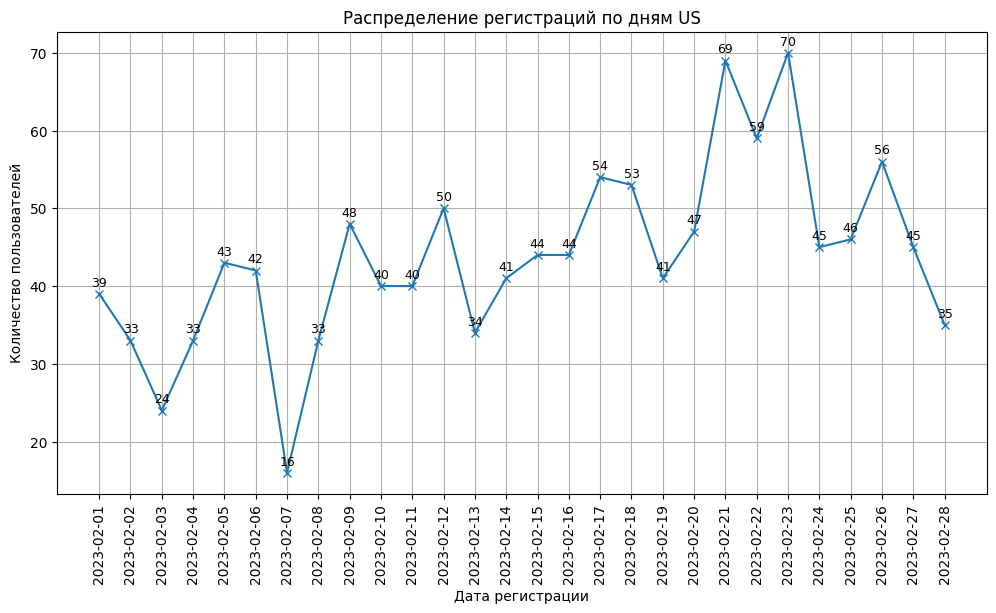

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(registration_by_users['install_date'], registration_by_users['unique_users'], marker='x')

# подписи
for x, y in zip(registration_by_users['install_date'], registration_by_users['unique_users']):
    plt.text(x, y + 1, str(y), ha='center', fontsize=9)

plt.title('Распределение регистраций по дням US')
plt.xlabel('Дата регистрации')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.xticks(registration_by_users['install_date'], rotation=90)
plt.show()

#### Распределение регистраций по языкам US 

In [123]:
users_by_lang = us_users.groupby('lang')['user_id'].nunique().reset_index(name='unique_users_lang')
users_by_lang_cleaned = users_by_lang[~users_by_lang['lang'].str.contains('0')].sort_values(by='unique_users_lang', ascending=False) # remove 0 (prev. null values)
users_by_lang_cleaned.head(3)

,lang,unique_users_lang
46,en_US,1068
24,en_IR,14
55,es_US,13


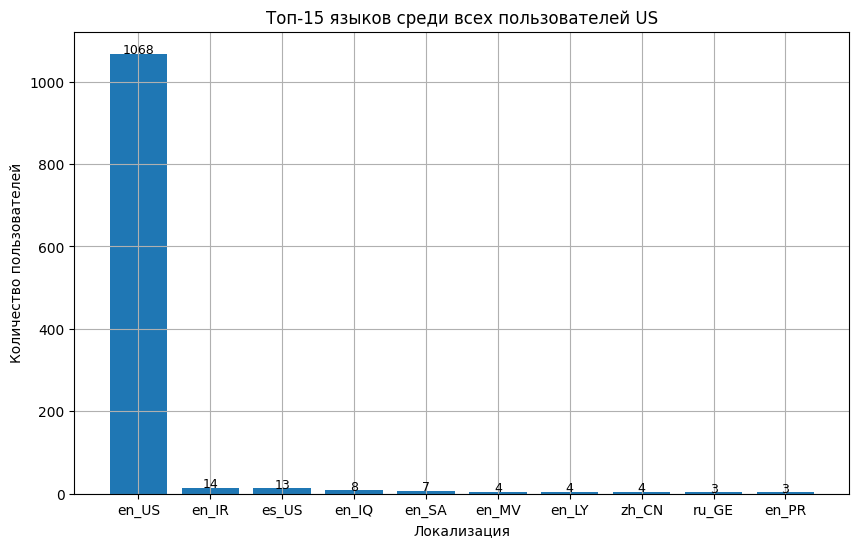

In [124]:
plt.figure(figsize=(10, 6))
bars = plt.bar(users_by_lang_cleaned.head(10)['lang'], users_by_lang_cleaned.head(10)['unique_users_lang'])

# Добавим подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(int(height)), ha='center', fontsize=9)

plt.title('Топ-15 языков среди всех пользователей US')
plt.xlabel('Локализация')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

#### Summary юзеров, которые пришли с US кампании

In [125]:
us_summary = {
    'unique_users': us_users['user_id'].nunique(),
    'paying_users': us_users[us_users['price'] > 0]['user_id'].nunique(),
    'total_revenue': us_users['price'].sum(),
    'avg_revenue_per_user': us_users['price'].sum() / us_users['user_id'].nunique(),
    'avg_revenue_per_payer': us_users['price'].sum() / us_users[us_users['price'] > 0]['user_id'].nunique()
}
us_summary

{'unique_users': 1224,
 'paying_users': 88,
 'total_revenue': np.float64(8110.0),
 'avg_revenue_per_user': np.float64(6.625816993464053),
 'avg_revenue_per_payer': np.float64(92.1590909090909)}

#### Внутри US кампаний есть 3 разных, посмотрим с какой оплачивали

In [126]:
paying_users_us = us_users[(us_users['price'] > 0)]

paid_by_campaign = paying_users_us.groupby('campaign')['user_id'].nunique().reset_index(name='paying_users')

paid_by_campaign

,campaign,paying_users
0,US Common_,88


#### Распределение по активностям зареганых пользователей US

In [127]:
activities = ['sail', 'kite', 'wind', 'surf', 'fish', 'snow', 'other']

users_by_activities_us = {
        activity: us_users[us_users[activity] == 1]['user_id'].nunique() 
        for activity in activities}

# to df
users_by_activities_us_df = pd.DataFrame(list(users_by_activities_us.items()), columns=['activities', 'unique_users']).sort_values(by='unique_users', ascending=False)
users_by_activities_us_df

,activities,unique_users
6,other,348
4,fish,308
0,sail,230
3,surf,102
5,snow,74
1,kite,29
2,wind,29


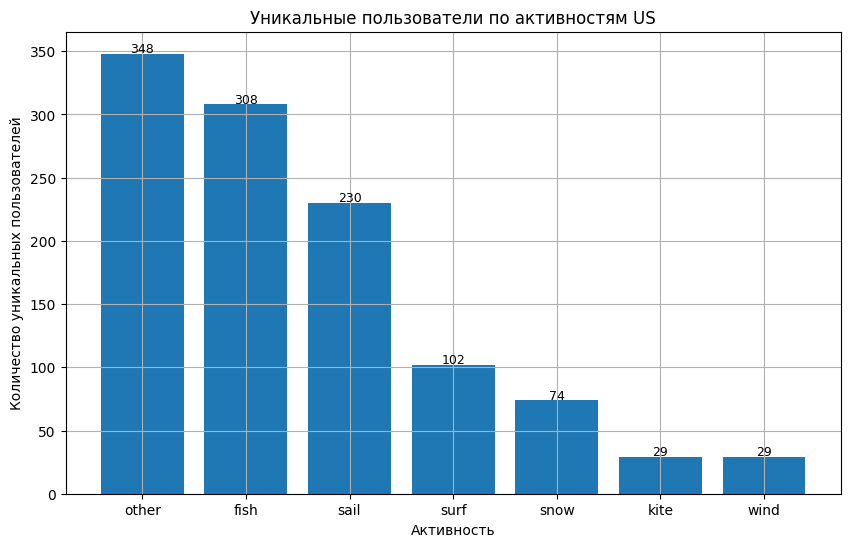

In [128]:
plt.figure(figsize=(10, 6))
bars = plt.bar(users_by_activities_us_df['activities'], users_by_activities_us_df['unique_users'])

# подписи
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)), ha='center', fontsize=9)

plt.title('Уникальные пользователи по активностям US')
plt.xlabel('Активность')
plt.ylabel('Количество уникальных пользователей')
plt.grid(True)
plt.show()

#### Заплатившие по активностям US

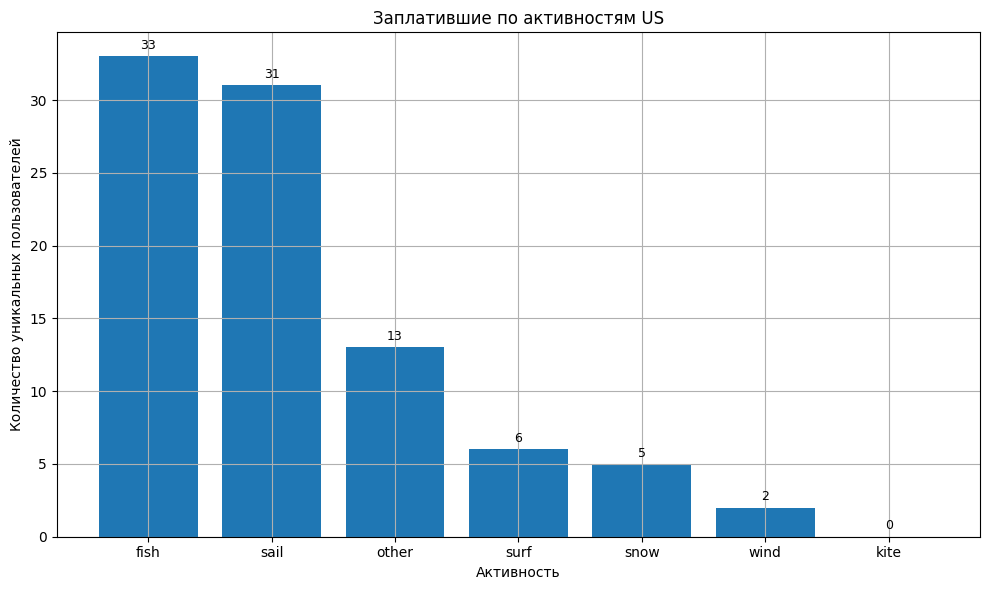

In [129]:
paying_users_by_activity_us = {
    activity: paying_users_us[paying_users_us[activity] == 1]['user_id'].nunique()
    for activity in activities
}

paying_users_by_activity_us_df = pd.DataFrame(paying_users_by_activity_us.items(), columns=['activities', 'unique_users']).sort_values(by='unique_users', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(paying_users_by_activity_us_df['activities'], paying_users_by_activity_us_df['unique_users'])

# подписи
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', fontsize=9)

plt.title('Заплатившие по активностям US')
plt.xlabel('Активность')
plt.ylabel('Количество уникальных пользователей')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Конверсия US

In [130]:
activities_us_df = users_by_activities_us_df.join(paying_users_by_activity_us_df.set_index('activities'), on='activities', how='inner', rsuffix='_merged')

activities_us_df['CR'] = ((activities_us_df['unique_users_merged'] / activities_us_df['unique_users']) * 100).round(2)

activities_us_df.sort_values(by='CR', ascending=False)

,activities,unique_users,unique_users_merged,CR
0,sail,230,31,13.48
4,fish,308,33,10.71
2,wind,29,2,6.90
5,snow,74,5,6.76
3,surf,102,6,5.88
6,other,348,13,3.74
1,kite,29,0,0.00


#### Зареганые пользователи по активностям по дням US

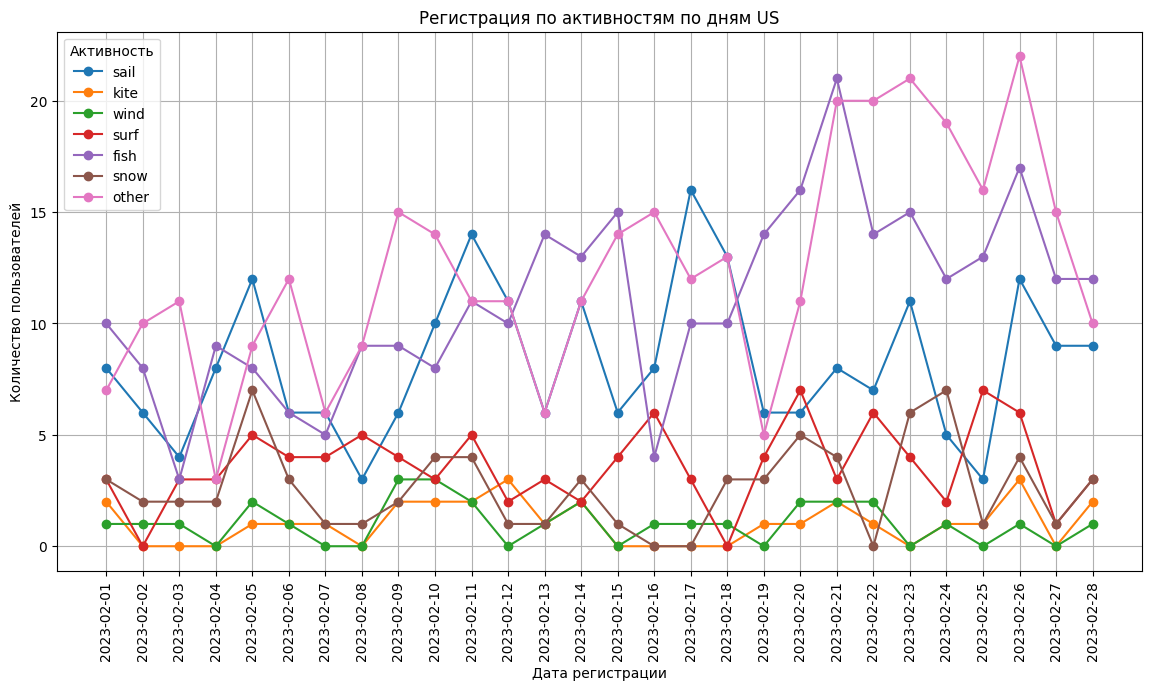

In [131]:
activities_by_day = us_users.groupby('install_date')[activities].sum().reset_index()

plt.figure(figsize=(14, 7))
for activity in activities:
    plt.plot(activities_by_day['install_date'], activities_by_day[activity], marker='o', label=activity)

plt.title('Регистрация по активностям по дням US')
plt.xlabel('Дата регистрации')
plt.ylabel('Количество пользователей')
plt.xticks(activities_by_day['install_date'], rotation=90)
plt.grid(True)
plt.legend(title='Активность')
plt.show()

#### Покупки US по дням неделям

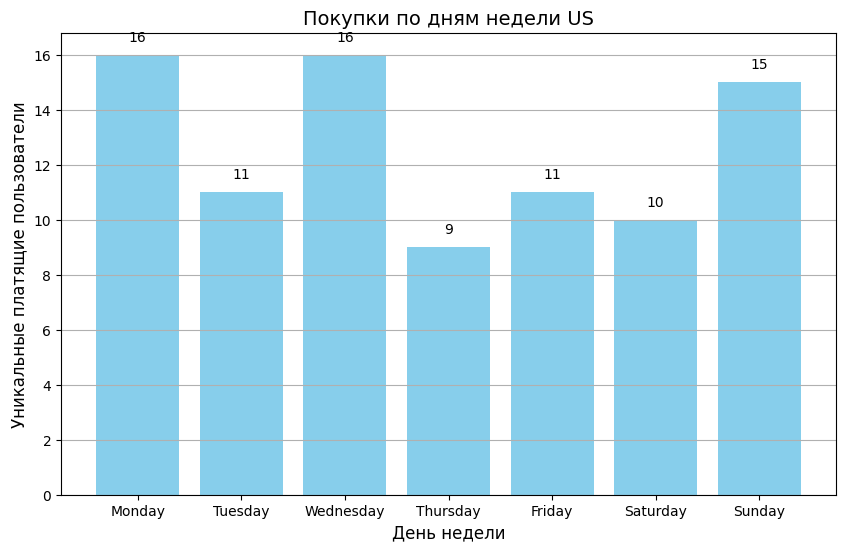

In [132]:
us_users['weekday'] = pd.to_datetime(us_users['install_date']).dt.day_name()

weekday_payers = us_users[(us_users['price'] > 0)].groupby('weekday')['user_id'].nunique().reset_index(name='paying_users')
weekday_users = us_users.groupby('weekday')['user_id'].nunique().reset_index(name='unique_users')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_payers['weekday'] = pd.Categorical(weekday_payers['weekday'], categories=weekday_order, ordered=True)
weekday_users['weekday'] = pd.Categorical(weekday_users['weekday'], categories=weekday_order, ordered=True)

weekday_payers = weekday_payers.sort_values('weekday')
weekday_users = weekday_users.sort_values('weekday')

plt.figure(figsize=(10, 6))
bars = plt.bar(weekday_payers['weekday'], weekday_payers['paying_users'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', fontsize=10)

plt.title('Покупки по дням недели US', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Уникальные платящие пользователи', fontsize=12)
plt.grid(True, axis='y')
plt.show()


In [133]:
weekday_us_df = weekday_payers.join(weekday_users.set_index('weekday'), on='weekday', how='inner', rsuffix='_merged')

weekday_us_df['CR'] = ((weekday_us_df['paying_users'] / weekday_us_df['unique_users']) * 100).round(2)

weekday_us_df.sort_values(by='CR', ascending=False)

,weekday,paying_users,unique_users,CR
1,Monday,16,168,9.52
6,Wednesday,16,175,9.14
3,Sunday,15,190,7.89
5,Tuesday,11,161,6.83
0,Friday,11,163,6.75
2,Saturday,10,172,5.81
4,Thursday,9,195,4.62


#### CPA Cost Per Action US

In [134]:
costs_daily_us = us_costs.groupby(['date'])['cost'].sum().reset_index()

merged_daily_us = pd.merge(registration_by_users, costs_daily_us, left_on=['install_date'], right_on=['date'])
merged_daily_us['CPA'] = merged_daily_us['cost'] / merged_daily_us['unique_users']
merged_daily_us.head(3)

,install_date,unique_users,date,cost,CPA
0,2023-02-01,39,2023-02-01,89.98,2.307179
1,2023-02-02,33,2023-02-02,82.21,2.491212
2,2023-02-03,24,2023-02-03,114.22,4.759167


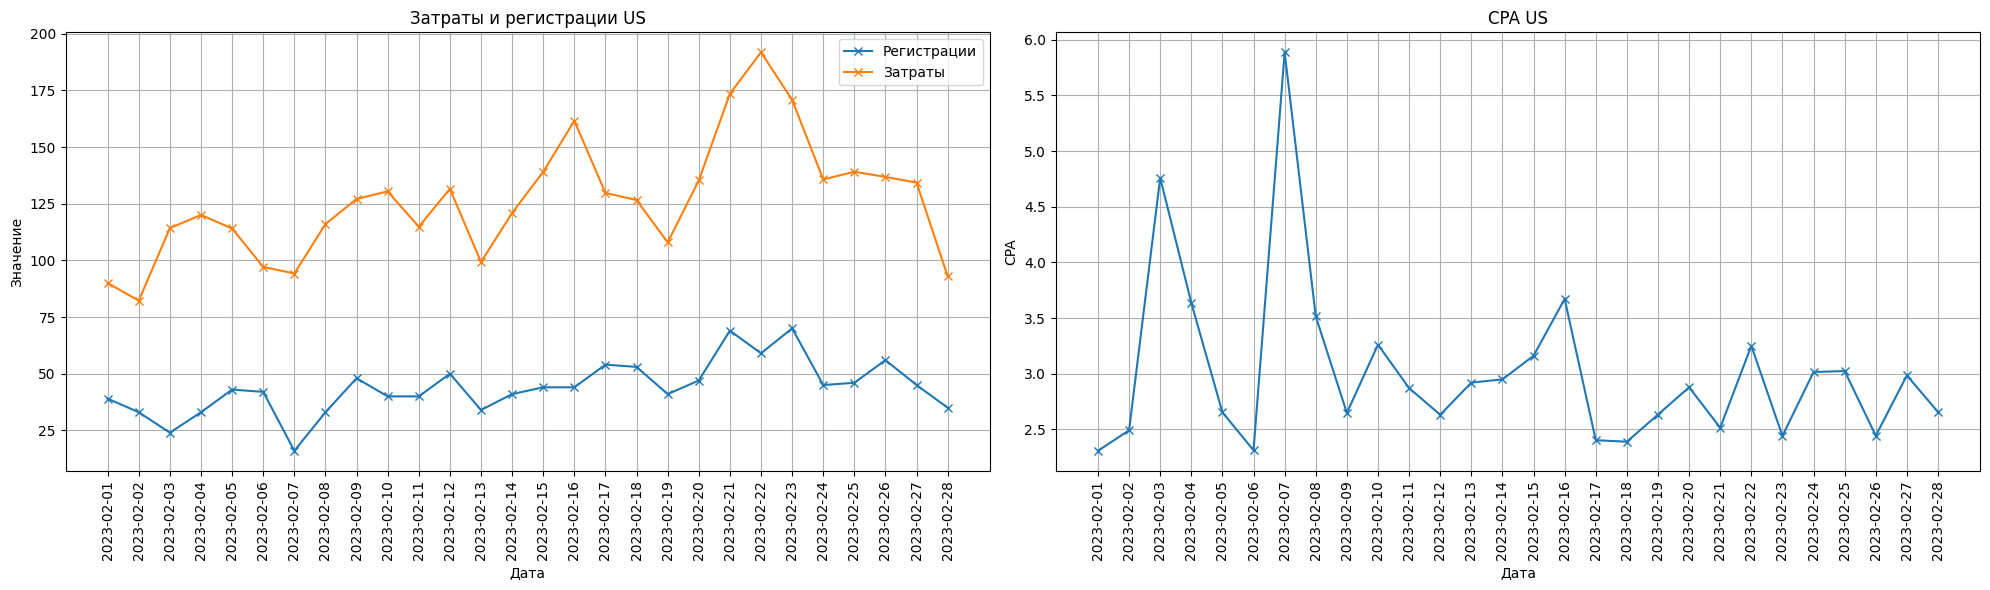

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharex=True)

axes[0].plot(merged_daily_us['install_date'], merged_daily_us['unique_users'], marker='x', linestyle='-', label='Регистрации')
axes[0].plot(merged_daily_us['install_date'], merged_daily_us['cost'], marker='x', linestyle='-', label='Затраты')
axes[0].set_title('Затраты и регистрации US')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Значение')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xticks(merged_daily_us['install_date'])
axes[0].legend()
axes[0].grid(True)

axes[1].plot(merged_daily_us['install_date'], merged_daily_us['CPA'], marker='x')
axes[1].set_title('CPA US')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('CPA')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xticks(merged_daily_us['install_date']) 
axes[1].grid(True)

plt.tight_layout()
plt.show()


#### Распределение покупок по активностям US

In [136]:
product_activity_matrix = pd.DataFrame()

for activity in activities:
    filtered = us_users[(us_users['price'] > 0) & (us_users[activity] == 1)]
    counts = filtered['product'].value_counts()
    product_activity_matrix[activity] = counts

product_activity_matrix = product_activity_matrix.fillna(0)

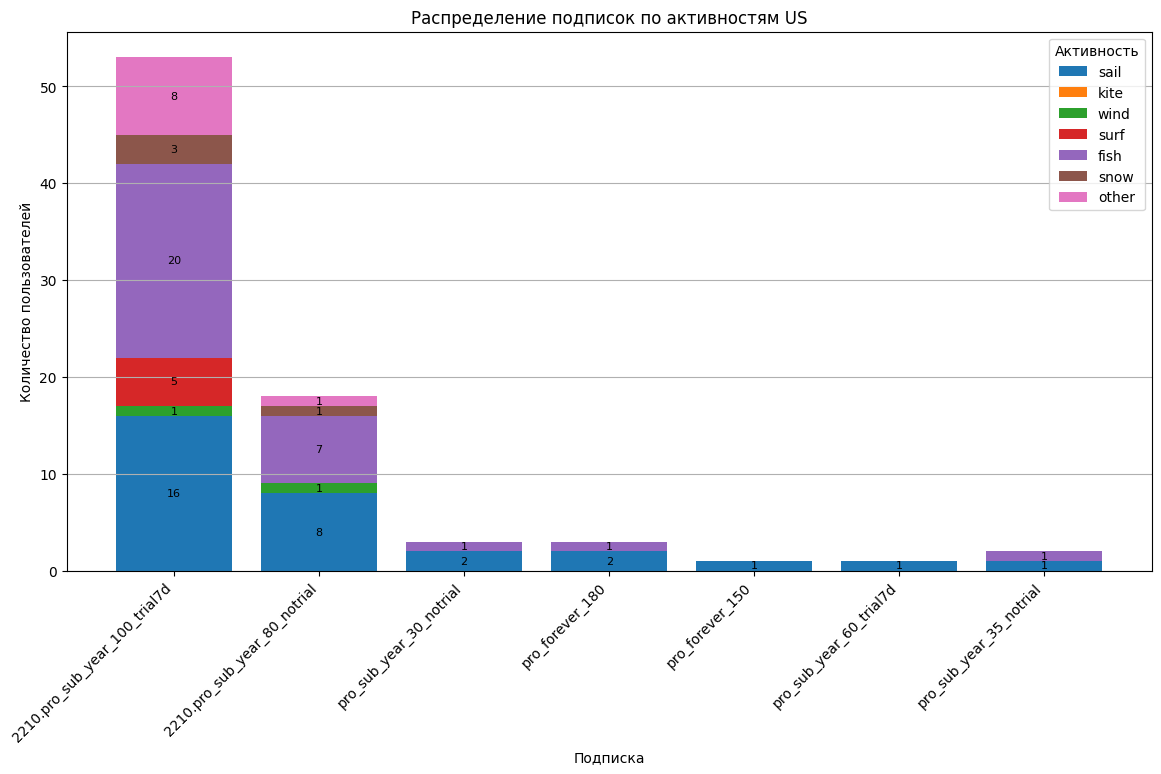

In [137]:
fig, ax = plt.subplots(figsize=(14, 7))
bottom = pd.Series([0]*len(product_activity_matrix), index=product_activity_matrix.index)

for activity in activities:
    bars = ax.bar(product_activity_matrix.index, product_activity_matrix[activity], bottom=bottom, label=activity)
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height)}',
                ha='center',
                va='center',
                fontsize=8
            )
    bottom += product_activity_matrix[activity]

ax.set_title('Распределение подписок по активностям US')
ax.set_xlabel('Подписка')
ax.set_ylabel('Количество пользователей')
ax.legend(title='Активность')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## Найти, как минимум, две кампании, в рамках которых происходило что-то странное, и попробовать объяснить причину. 


#### Summary по кампаниям

In [138]:
user_summary = (
    users.groupby('campaign')
    .agg(
        total_users=('user_id', 'nunique'),
        paying_users=('price', lambda x: (x > 0).sum()),
        total_revenue=('price', 'sum')
    )
    .reset_index()
)

cost_summary = (
    costs
    .groupby('campaign')
    .agg(total_cost=('cost', 'sum'))
    .reset_index()
)

user_summary

,campaign,total_users,paying_users,total_revenue
0,AL Discovery,9,0,0.0
1,AL SKAG,6,0,0.0
2,AR Discovery,84,2,100.0
3,AR Skag,77,3,150.0
4,AT Common_,18,0,0.0
...,...,...,...,...
100,US_prod_page,2,0,0.0
101,VN Discovery,37,0,0.0
102,VN SKAG,72,1,50.0
103,ZA Discovery,81,5,330.0


In [149]:
campaign_stats = pd.merge(user_summary, cost_summary, on='campaign', how='outer')

# метрики
campaign_stats['ARPU'] = campaign_stats['total_revenue'] / campaign_stats['total_users']
campaign_stats['ARPPU'] = campaign_stats['total_revenue'] / campaign_stats['paying_users']
campaign_stats['CR'] = campaign_stats['paying_users'] / campaign_stats['total_users']
campaign_stats['ROI'] = campaign_stats['total_revenue'] / campaign_stats['total_cost']
campaign_stats['CPI'] = campaign_stats['total_cost'] / campaign_stats['total_users']

campaign_stats.fillna(0, inplace=True)
campaign_stats.head(3)

,campaign,total_users,paying_users,total_revenue,total_cost,ARPU,ARPPU,CR,ROI,CPI
0,AL Discovery,9.0,0.0,0.0,15.70,0.000000,0.0,0.00000,0.000000,1.744444
1,AL SKAG,6.0,0.0,0.0,1.87,0.000000,0.0,0.00000,0.000000,0.311667
2,AR Discovery,84.0,2.0,100.0,56.08,1.190476,50.0,0.02381,1.783167,0.667619


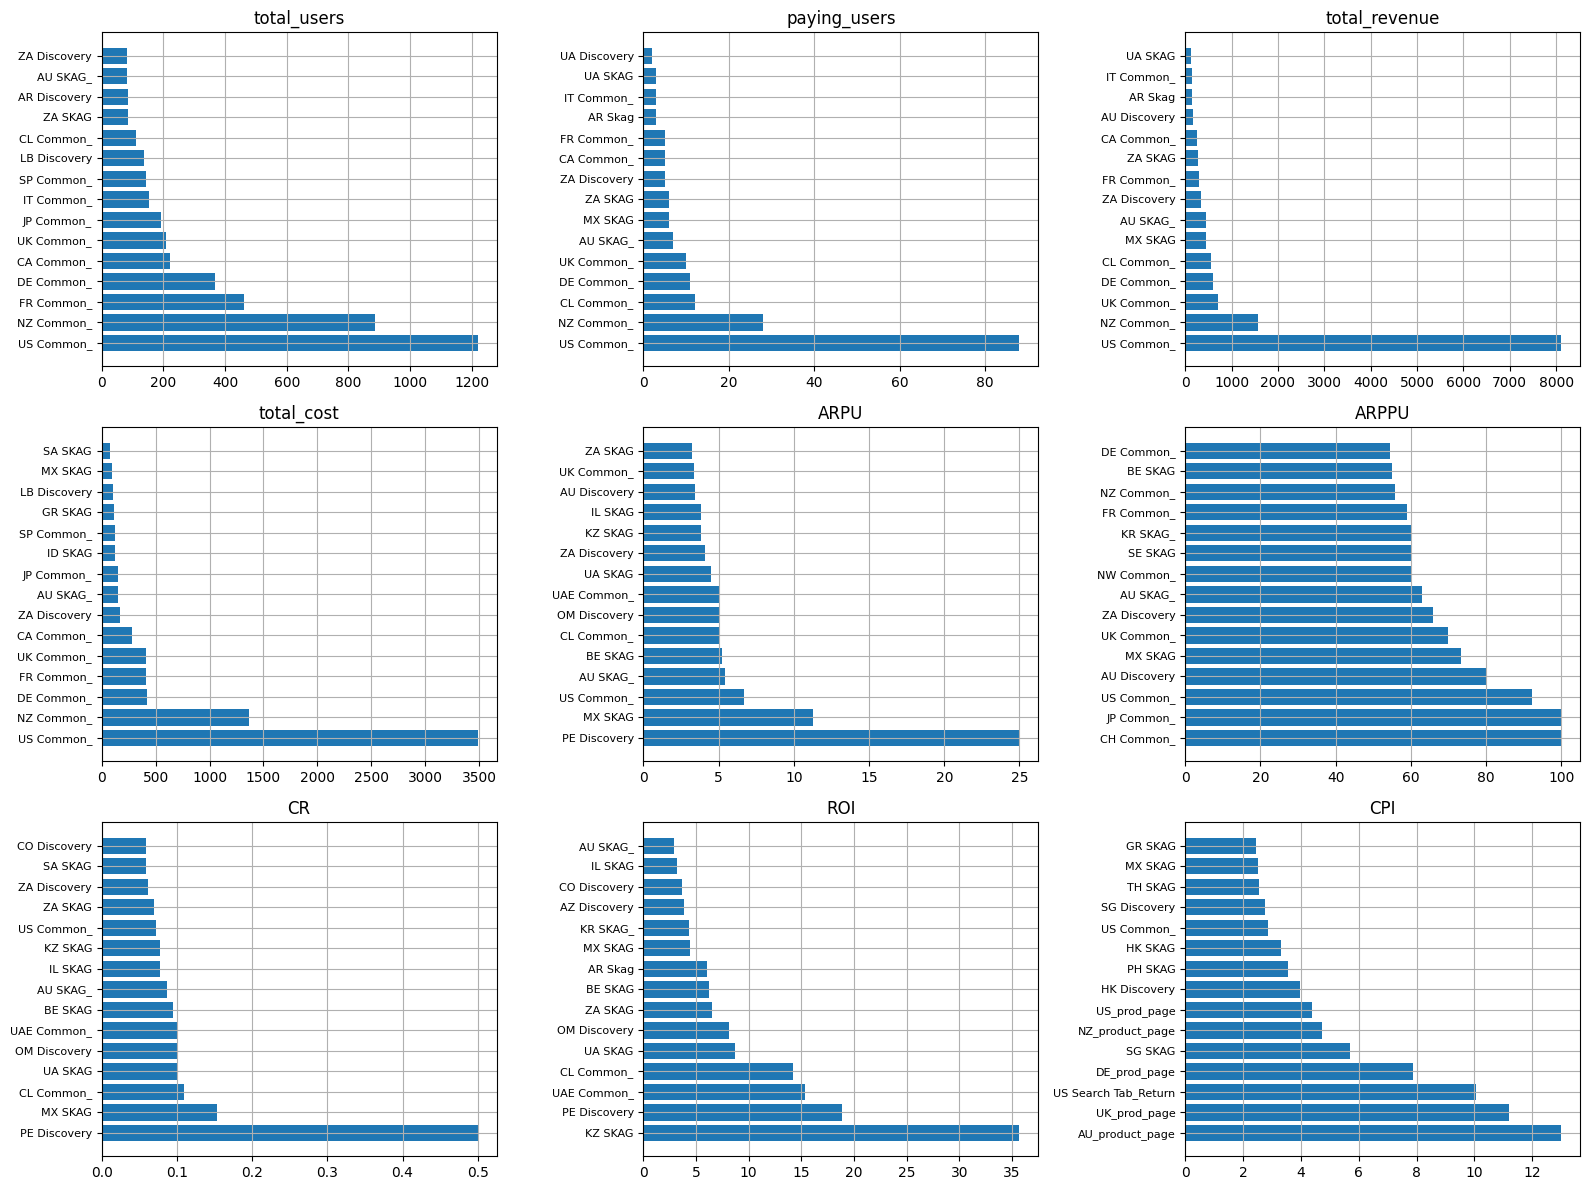

In [150]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, metric in enumerate(campaign_stats.columns[1:]):
    ax = axes[i]
    sorted_df = campaign_stats.sort_values(metric, ascending=False).head(15)
    
    ax.barh(sorted_df['campaign'], sorted_df[metric])
    ax.set_title(metric)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True)

plt.tight_layout()
plt.show()

#### Какая кампания для какой активности более эффективна

In [141]:
activity_by_campaign = (
    users.groupby('campaign')[activities]
    .sum()
    .assign(total=lambda df: df.sum(axis=1))
    .reset_index()
)

activity_by_campaign_10 = activity_by_campaign.sort_values(by='total', ascending=False).head(10).set_index('campaign')[activities]

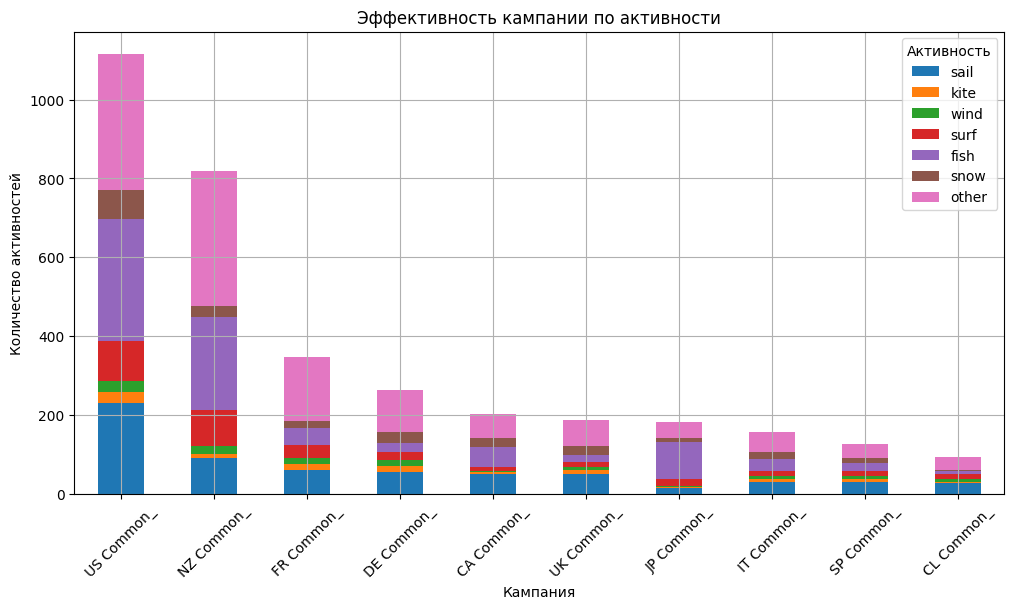

In [142]:
activity_by_campaign_10.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Эффективность кампании по активности")
plt.ylabel("Количество активностей")
plt.xlabel("Кампания")
plt.xticks(rotation=45)
plt.legend(title='Активность')
plt.grid(True)
plt.show()

#### Активность по кампаниям

In [143]:
users_by_campaign = (
    users.groupby('campaign')['user_id']
    .nunique()
    .sort_values(ascending=False)
    .head(5)
    .index
)

users_by_campaign = (
    users
    .groupby('campaign')[activities]
    .sum()
    .loc[users_by_campaign]
    .T
)

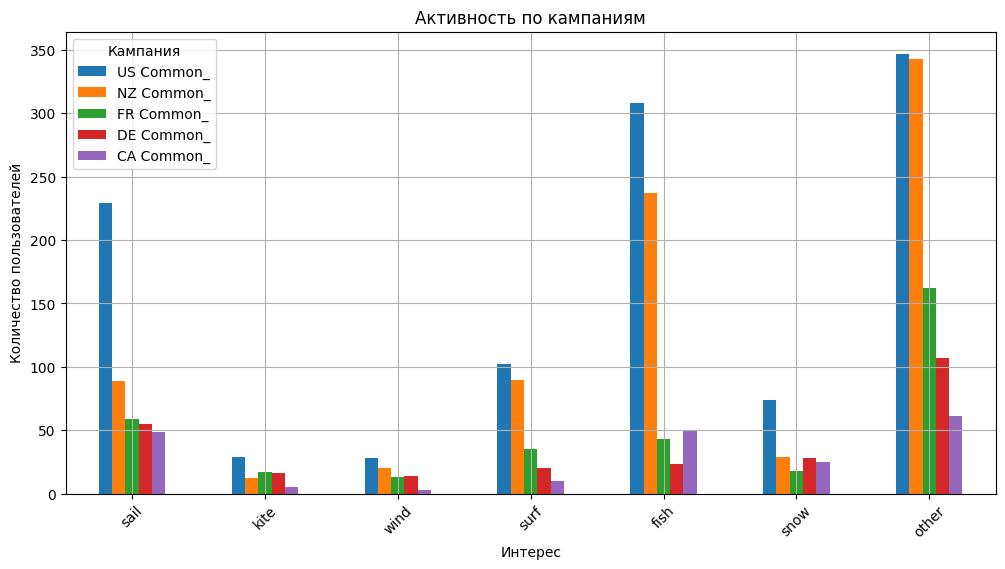

In [144]:
users_by_campaign.plot(kind='bar', figsize=(12, 6))
plt.title("Активность по кампаниям")
plt.ylabel("Количество пользователей")
plt.xlabel("Интерес")
plt.xticks(rotation=45)
plt.legend(title='Кампания')
plt.grid(True)
plt.show()

#### Какие подписки выбирают люди с кампаний

In [145]:
product_by_campaign = (
    users[
        (users['price'] > 0)
    ].groupby(['campaign', 'product'])
    .size()
    .reset_index(name='count')
    .sort_values(['campaign', 'count'], ascending=[True, False])
)

top_product_data = product_by_campaign.sort_values(by='count', ascending=False).head(10)

pivot_df = top_product_data.pivot(index='campaign', columns='product', values='count').fillna(0)

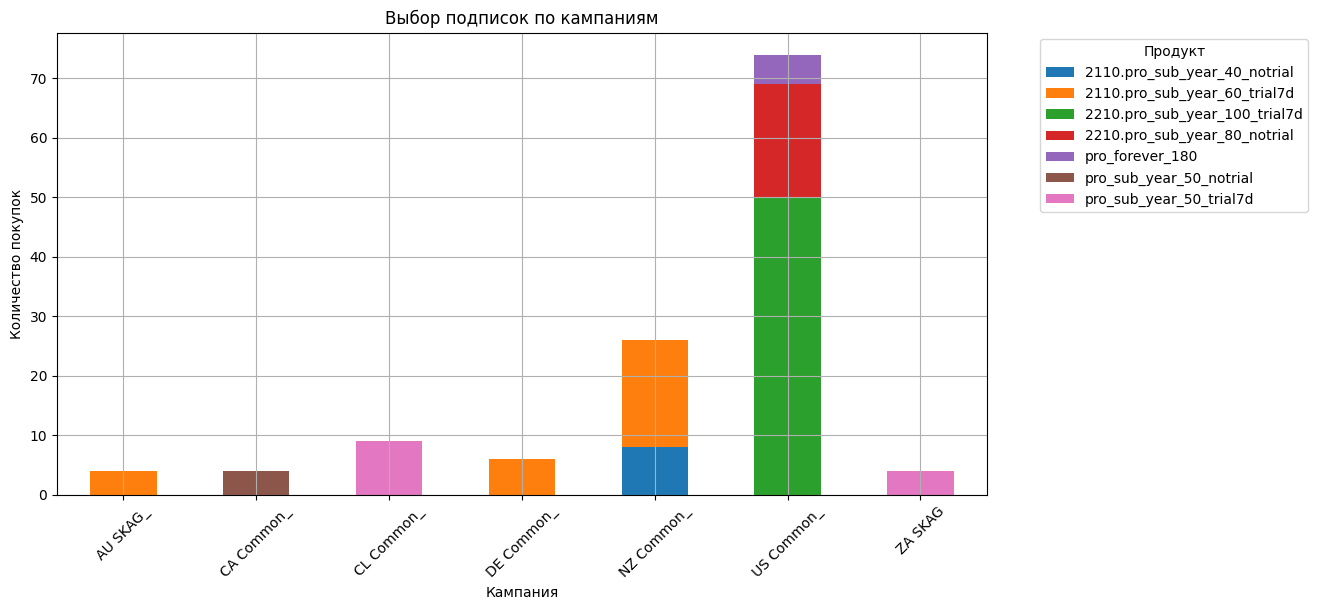

In [146]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Выбор подписок по кампаниям")
plt.ylabel("Количество покупок")
plt.xlabel("Кампания")
plt.xticks(rotation=45)
plt.legend(title='Продукт', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Установки по кампаниям

In [147]:
top5_campaigns = (
    users.groupby('campaign')['user_id']
    .count()
    .sort_values(ascending=False)
    .head(5)
    .index
)

daily_installs = (
    users[users['campaign'].isin(top5_campaigns)]
    .groupby(['install_date', 'campaign'])
    .size()
    .reset_index(name='daily_installs')
)

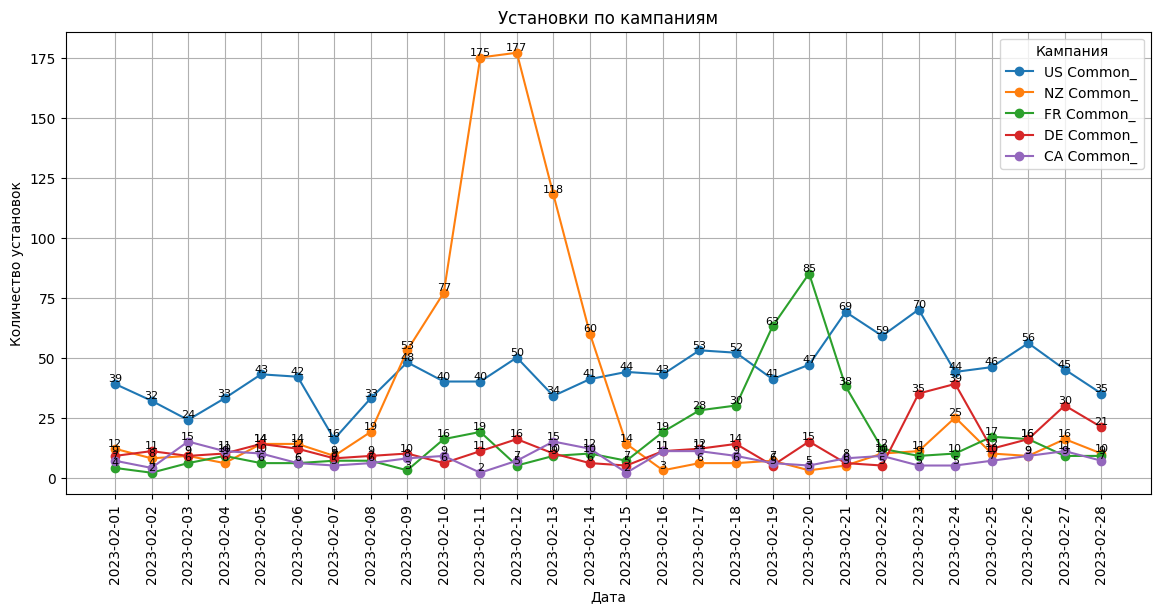

In [148]:
plt.figure(figsize=(14, 6))

for campaign in top5_campaigns:
    data = daily_installs[daily_installs['campaign'] == campaign]
    plt.plot(data['install_date'], data['daily_installs'], marker='o', label=campaign)
    plt.xticks(data['install_date'], rotation=90)
    for x, y in zip(data['install_date'], data['daily_installs']):
        plt.text(x, y + 1, str(y), ha='center', fontsize=8)

plt.title("Установки по кампаниям")
plt.xlabel("Дата")
plt.ylabel("Количество установок")
plt.legend(title="Кампания")
plt.grid(True)
plt.show()


## Выводы

**1. Найти три наиболее прибыльные кампании и три наиболее убыточные.**

_Наиболее прибыльные:_
- US Common_ с профитом 4622.11
- CL Common_ 515.82
- MX SKAG 341.43

_Наиболее убыточные:_
- ID SKAG -125.60
- FR Common_ -111.30
- LB Discovery -106.97

**2. В разрезе US кампании проанализировать пользователей и найти какие-либо закономерности.**

_Распределение регистраций по дням US_
- Вторая половина месяца показала значительный рост регистраций, особенно после 15 февраля - становится теплее и появляются более благоприятные условия для занятия наружного спорта (+провела бы доп анализ почему мог возникнуть такой всплеск - мб пуши или реклама)
Единственный день с аномально низкой регистрацией. Возможны технические проблемы или сбой трекинга (хотя на рекламу потрачено столько же, сколько и в дни до этого)

_Распределение регистраций по языкам US_
- en_US - пользователи из США, поэтому логично 

_Summary юзеров, которые пришли с US кампании_
- ARPPU = €92.16 — высокая: платящие пользователи в среднем тратят почти €100, что говорит о том, что они сразу покупают годовые подписки.
ARPU = €6.63
CR ≈ 7.2%

_Внутри US кампаний есть 3 разных, посмотрим с какой оплачивали_
- все оплачивали от одной кампании - US Common_

_Распределение по активностям зареганных пользователей US_
- информация по февралю - поэтому преобладать будут пользователи, которые интересуются теми активностями, что возможны в этот месяц сейлинг, рыбалка и другое
чуть дальше выяснится что несмотря на то, что в others наибольший поток, конверсия там минимальная 

_Заплатившие по активностям US_
- информация по февралю - поэтому преобладать будут пользователи, которые интересуются теми активностями, что возможны в этот месяц сейлинг, рыбалка

Конверсия US_
- информация по февралю - поэтому преобладать будут пользователи, которые интересуются теми активностями, что возможны в этот месяц сейлинг, рыбалка

_Зареганные пользователи по активностям по дням US_
- kite, wind, snow — наименее массовые активности, с редкими пиками (что логично из-за заканчивающегося сезона лыж/борда и не начавшегося kite)
- из-за широкой географии США - sail и surf стабильно удерживаются на среднем уровне, что скорее всего говорит о том, что это пользователи западного побережья
- other и fish лидируют практически каждый день месяца — их регистрационные показатели consistently выше других (стоит рассмотреть что такое other)

_Покупки US по дням неделям_
- Самая высокая конверсия - начало недели и воскресенье
Это ключевые дни для привлечения платящих пользователей.
Четверг и пятницу конверсия наименьшая, есть смысл оптимизировать бюджеты на эти дни 
В выходные меньше конверсия, а в пн и вт выше - скорее всего из-за того, что пользователи едут на свои активности, скачав приложение и после выходных, протестировав его покупают

_CPA Cost Per Action US_
- Затраты в целом росли в тчении всего временя для US кампаний, повышенный затраты не принесли больше зарегистрировавших пользователей (например, 16 числа было потрачено больше, чем в предыдщих днях, но пользователей относительно столько же)
Самые плохие дни - 3 и 7 февраля
Общая динамика говорит о том, что увеличение затрат в конце месяца давало больше регистраций, но не всегда снижало CPA → есть потенциал для оптимизации кампаний.

_Распределение покупок по активностям US_
- Подписка year_100_trial7d — самая популярная, на неё пришлось наибольшее количество покупок + она самая разнообразная по активностям пользователей
Пользователи, которые интересуются fish + sail чаще всего покупают именно эту подписку

В целом пользователи с активностью sail и fish покупают подписки чаще, чем с остальными
С kite не куплена ни одна подписка

**3. Найти, как минимум, две кампании, в рамках которых происходило что-то странное, и попробовать объяснить причину.**
эти две кампании - US Common_ и NZ Common_ - самый большой трафик для анализа и выводов

_Summary по кампаниям_
- US Common_
Лидер по всем основным метрикам: total_users, paying_users, total_revenue, total_cost.
Но при этом:
ARPU (~6–7) и ARPPU (~80) — не рекордные.
ROI не попал в топ, значит, несмотря на масштаб, эффективность не максимальна.
Вывод: высокая база, но потенциально низкая маржинальность
- AU_product_page и UK_product_page
CPI очень высокий (>10), но ROI не входит в топ т. е. затраты не окупаются.

- NZ Common_ дальше покажет высокие показатели, но в топе в общем саммари нет по метрикам их в списке (хотя они вторые по объему)

Honourable mention: PE Discovery (paying_users ≈ 1, и total_users низкий - высокие метрики обеспечены за счет маленькой базы юзеров), KZ SKAG, CH Common_ (для этих кампаний аналогично)

_Какая кампания для какой активности более эффективна_
- US Common_ — безусловный лидер по объёму - возможно перекос бюджета или сильная зависимость от одной географии
NZ Common_ — второе место:
Очень много покупок в Other -> требует более подробного анализа!
Некоторые активности (kite, wind, snow) почти незаметны (конец сезона и не начало другого)
Несколько кампаний почти не отличаются друг от друга по структуре - схожая аудитория, но разный охватность или бюджет
Аудитории в других странах либо менее активны, либо охвачены слабее. -> развитие маркета 

Common_ в топе только кампании с этим префиксом - посмотреть в чем их размещение отличается от остальных

_Активность по кампаниям_
- US Common_ и NZ Common_ преобладают в Other - стоит посмотреть что там включает и посмотреть можно ли как то монетизировать, если это популярно - возможно это какие то локальные виды спорта популярны в США (где наступает весна) и в НЗ (где наступает осень)
US Common_ самая популярная кампания с которой приходят пользователи увлекающиеся сейлингом

_Какие подписки выбирают люди с кампаний_
- US Common_ доминирует по всем продуктам
Причины: 
Главный рынок 
Популярна годовая подписка с триалом в 7дней
Только она раскручена и на остальные рынки тратится не так много вложений

-  NZ Common_ 
Популярна годовая подписка с триалом в 7дней
Возможно обеспечено всплеском потока про который в след  пункте

_Установки по кампаниям_
- Аномальный всплеск в NZ Common_ (9–14 февраля), хотя по остальным дням значения не превышают 20.
Возможные причины:
Сбой трекинга / дубликаты установок.
Краткосрочная акция, которая дала этот всплеск
- US Common_ стабильна, но без бурного роста
По объёму лидирует (в среднем 40–70 установок в день), но нет резких пиков, как у других, возможно, потолок по охвату уже достигнут — стоит тестировать новые гипотезы.

![Описание](https://storage.fabulae.ru/images/gifts/gift_11344.jpg)